In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("SMSSpamCollection", sep='\t', names = ['label', 'text'])

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
for i in range(10):
    print(df.iloc[i, -1])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

In [6]:
#Data Cleaning

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [7]:
sn = SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [8]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub("[^a-z0-9]", ' ', sms)
    sms = nltk.word_tokenize(sms)
    sms = [t for t in sms if len(t)>1]
    sms = [sn.stem(word) for word in sms if word not in stop ]
    sms = ' '.join(sms)    
    return sms

In [10]:
clean_text("Get is.... they.. and are  Unlimitied dtaa <<<!21213>>FAFDAS asfh Frree Data 1000GB ..... ")

'get unlim dtaa 21213 fafda asfh frree data 1000gb'

In [11]:
df['clean_text'] = df['text'].apply(clean_text)

In [12]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [13]:
from wordcloud import WordCloud

In [14]:
hamdata = df[df['label'] =='ham']
hamdata = hamdata['clean_text']

In [15]:
def wordCloud(data):
    words = ' '.join(data)
    wc = WordCloud()
    wc = wc.generate(words)
    
    plt.figure(figsize =(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show
    

Ham Data Word :


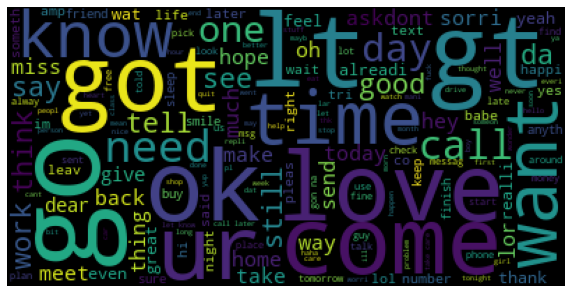

In [16]:
print ("Ham Data Word :")
wordCloud(hamdata)

In [17]:
spamdata = df[df['label'] == "spam"]
spamdata = spamdata['clean_text']

Spam Data Word :


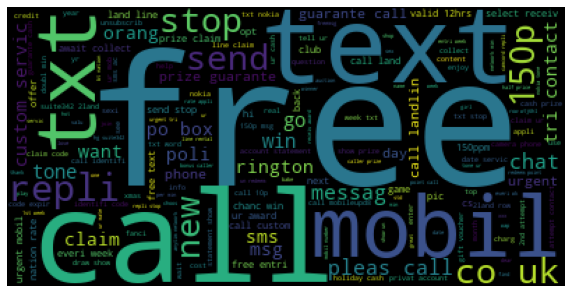

In [18]:
print ("Spam Data Word :")
wordCloud(spamdata)

In [19]:
df


,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tri contact 750 pound prize claim eas...
5568,ham,Will ü b going to esplanade fr home?,go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer()

In [25]:
X = cv.fit_transform(df['clean_text']).toarray()

In [26]:
X.shape

(5572, 7242)

In [28]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [29]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [30]:
#Model Building

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
model = MultinomialNB()

In [35]:
model.fit(X_train,y_train)

MultinomialNB()

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_test, y_pred

(array([0, 1, 0, ..., 0, 1, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 1, 0], dtype=uint8))

In [39]:
pd.DataFrame({'Actual':y_test, 'Predited':y_pred}).head(10)

,Actual,Predited
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [40]:
#Evaluation

In [41]:
model.score(X_train, y_train)

0.9925959165357864

In [42]:
model.score(X_test, y_test)

0.9838565022421525

In [43]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [44]:
confusion_matrix(y_test, y_pred)

array([[943,  12],
       [  6, 154]])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.93      0.96      0.94       160

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
f1_score()